# Digit Recognition
This notebook will explore digit recognition using kaggle data. THe goal will be to create a CNN that can predict the digits with above a 98% accuracy.

### Import The Required Packages

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O
import seaborn as sns 
import matplotlib.pyplot as plt
import random
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from __future__ import absolute_import, division, print_function, unicode_literals
from collections import Counter
# Enable eager execution


In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
y_train = train['label']
X_train = train.drop('label', axis=1)

### Preview the data

In [3]:
X_train.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
labels = train["label"].value_counts()
labels 

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

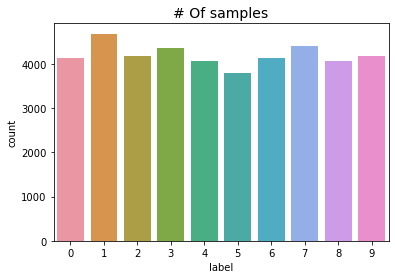

In [5]:
sns.set_palette("Accent")
sns.countplot(x=y_train)
plt.title('# Of samples', size=14)
plt.show()

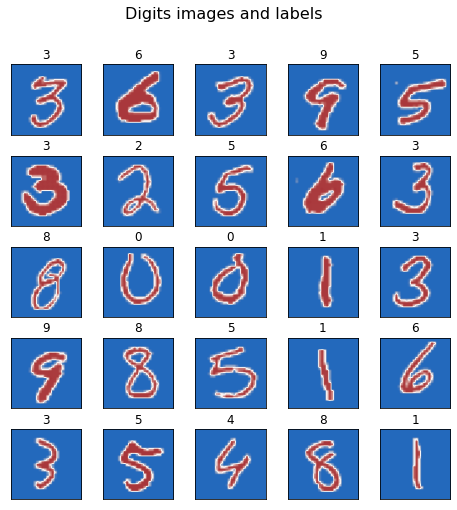

In [6]:
fig, ax = plt.subplots(5, 5, figsize=(8, 8))
fig.suptitle('Digits images and labels', fontsize=16)
ax = ax.ravel()
for i in range(25):
    sample_n = random.randint(0, X_train.shape[0])
    ax[i].imshow(np.array(X_train.iloc[sample_n]).reshape(28, 28), cmap='vlag')
    ax[i].get_xaxis().set_visible(False)
    ax[i].get_yaxis().set_visible(False)
    ax[i].set_title(y_train[sample_n], fontsize = 12)

plt.subplots_adjust(hspace=0.3)

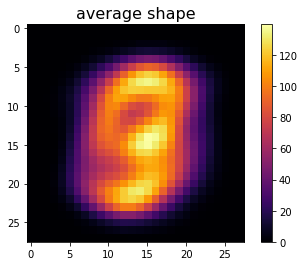

In [7]:
plt.imshow(np.array(X_train.mean()).reshape(28, 28), cmap='inferno')
plt.colorbar()
plt.title('average shape', {'fontsize': 16})
plt.show()

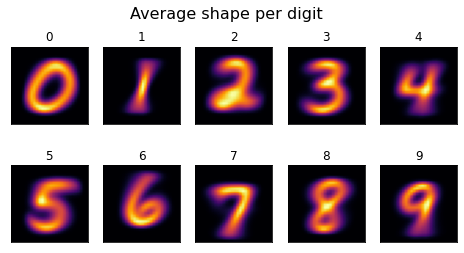

In [8]:
fig, ax = plt.subplots(2, 5, figsize=(8, 4))
fig.suptitle('Average shape per digit', fontsize=16)

ax = ax.ravel()

for i in range(10):
    ax[i].imshow(np.array(train[train['label'] == i].drop('label', axis=1).mean()).reshape(28, 28), cmap='inferno')
    ax[i].get_xaxis().set_visible(False)
    ax[i].get_yaxis().set_visible(False)
    ax[i].set_title(i, fontsize = 12)

In [9]:
X_train_array = np.array(X_train)
X_train_array

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [10]:
test_array = np.array(test)
test_array

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [11]:
X_train_array.shape

(42000, 784)

In [12]:
test_array.shape

(28000, 784)

In [13]:
X_train_array = X_train_array.reshape(42000, 28, 28, 1)
X_train_array.shape

(42000, 28, 28, 1)

In [14]:
test_array = test_array.reshape(-1, 28, 28, 1)
test_array.shape

(28000, 28, 28, 1)

In [15]:
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    width_shift_range=0.2,
    height_shift_range=0.2,
    fill_mode="constant",
    
    horizontal_flip=False,
    vertical_flip=False,
    
    rotation_range=20,
    
    validation_split=0.2
)

In [16]:
datagen.fit(X_train_array)

In [17]:
tf.random.set_seed(2022)

In [18]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))


In [19]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))


In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


history_new = model.fit(datagen.flow(X_train_array, y_train, batch_size=250, subset='training'),
                    epochs=250,
                    validation_data=datagen.flow(X_train_array, y_train,
         batch_size=10, subset='validation'))

Epoch 1/250
135/135 [==============================] - 16s 118ms/step - loss: 1.9570 - accuracy: 0.4843 - val_loss: 0.7302 - val_accuracy: 0.7639
Epoch 2/250
135/135 [==============================] - 16s 118ms/step - loss: 0.5389 - accuracy: 0.8290 - val_loss: 0.4325 - val_accuracy: 0.8625
Epoch 3/250
135/135 [==============================] - 16s 115ms/step - loss: 0.3441 - accuracy: 0.8932 - val_loss: 0.2942 - val_accuracy: 0.9068
Epoch 4/250
135/135 [==============================] - 16s 117ms/step - loss: 0.2664 - accuracy: 0.9173 - val_loss: 0.2471 - val_accuracy: 0.9237
Epoch 5/250
135/135 [==============================] - 16s 122ms/step - loss: 0.2255 - accuracy: 0.9305 - val_loss: 0.1944 - val_accuracy: 0.9393
Epoch 6/250
135/135 [==============================] - 16s 115ms/step - loss: 0.1917 - accuracy: 0.9415 - val_loss: 0.2020 - val_accuracy: 0.9400
Epoch 7/250
135/135 [==============================] - 16s 117ms/step - loss: 0.1797 - accuracy: 0.9431 - val_loss: 0.1656 -

In [ ]:
plt.figure(figsize = (12,10))
plt.title('Model loss', fontsize = 14)
plt.plot(range(len(history_new.history['loss'])), history_new.history['loss'], marker='o', c='gray')
plt.plot(range(len(history_new.history['loss'])), history_new.history['val_loss'], marker='o')
plt.legend(labels=['training loss', 'validation loss'])
plt.show()

In [ ]:
plt.figure(figsize = (12,10))
plt.title('Model accuracy', fontsize = 14)
plt.plot(range(len(history_new.history['loss'])), history_new.history['accuracy'], c='gray', marker='o')
plt.plot(range(len(history_new.history['loss'])), history_new.history['val_accuracy'], marker='o')
plt.legend(labels=['training accuracy', 'validation accuracy'])
plt.show()



## View the Testing data

In [ ]:
test_array = test_array / 255
test_result = model.predict(test_array)
test_result = np.array(pd.DataFrame(test_result).idxmax(axis=1))
fig, ax = plt.subplots(5, 5, figsize=(8, 8))
fig.suptitle('Digits images and labels', fontsize=16)
ax = ax.ravel()
for i in range(25):
    sample_n = random.randint(0, test.shape[0])
    ax[i].imshow(np.array(test.iloc[sample_n]).reshape(28, 28), cmap='inferno')
    ax[i].get_xaxis().set_visible(False)
    ax[i].get_yaxis().set_visible(False)
    ax[i].set_title(test_result[sample_n], fontsize = 12)

plt.subplots_adjust(hspace=0.3)
fig.show()

In [ ]:
ev = model.evaluate(X_train_array, y_train)
ev

In [ ]:
pred = np.array(pd.DataFrame(test_result).idxmax(axis=1))

In [ ]:
predicted_data = pd.DataFrame({
    'ImageId': test.index+1,
    'Label': test_result
})


In [ ]:
predicted_data.head()

In [ ]:
predicted_data.to_csv('pred.csv', index=False)